# Data Mining Project

**Authors:**
<br>Yogev Matalon
<br>Tomer Yanay
<br>Noam Tor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use("ggplot")
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline

## Load Data

In [2]:
df = pd.read_csv("train.csv")
df.head(5)

,feat_56,feat_7,feat_69,feat_12,feat_70,feat_51,feat_20,feat_21,feat_61,feat_23,target
0,0,0,0,0,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,0,0,0,0,0,Class_6
2,0,0,0,0,1,0,0,6,5,0,Class_6
3,0,0,0,0,6,0,0,0,0,0,Class_3
4,0,0,0,0,2,0,0,0,0,0,Class_3


# Step 1 - Data Exploration

### Find the most common classes and filter the dataset

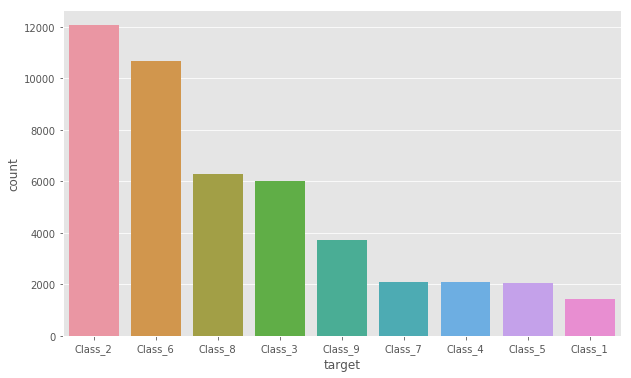

In [3]:
plt.figure(num=None, figsize=(10, 6), facecolor='w', edgecolor='k')
h = sns.countplot(x="target", data=df, order = df['target'].value_counts().index)

We can see that the most commun classes are number 2 and 6. We will use these classes for our project, and remove all other rows with other classes.

In [4]:
old_row_num = df.shape[0]
df = df[(df['target'] == 'Class_6') | (df['target'] == 'Class_2')]  # Select Features 2 and 6 only.
df.head(5)
df.index = range(0,df.shape[0],1)
row_num = df.shape[0]
print (old_row_num - row_num, "rows were removed.\nNow we have ", str(df.shape[0]) ," rows in our data.")

(23689, 'rows were removed.\nNow we have ', '22719', ' rows in our data.')


Data Label Distribution:

         NumOfRows  RowsPercent
Class_2      12059     0.530789
Class_6      10660     0.469211


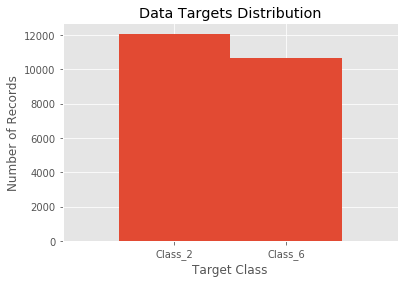

In [5]:
print('Data Label Distribution:\n')
classes_dist = pd.concat([pd.DataFrame(df.target.value_counts()), pd.DataFrame(df.target.value_counts())["target"] / df.shape[0]], axis = 1)
classes_dist.columns = ["NumOfRows" , "RowsPercent"]
print (classes_dist)

df.target.hist(bins=np.arange(3) - 0.5, width=1)
plt.xticks(range(2))
plt.xlim([-1, 2])
plt.title('Data Targets Distribution')
plt.xlabel('Target Class')
plt.ylabel('Number of Records')
plt.show()

We can declare that the classes are well-balanced.

## Explore the Features
### Description and Box Plot

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22719 entries, 0 to 22718
Data columns (total 11 columns):
feat_56    22719 non-null int64
feat_7     22719 non-null int64
feat_69    22719 non-null int64
feat_12    22719 non-null int64
feat_70    22719 non-null int64
feat_51    22719 non-null int64
feat_20    22719 non-null int64
feat_21    22719 non-null int64
feat_61    22719 non-null int64
feat_23    22719 non-null int64
target     22719 non-null object
dtypes: int64(10), object(1)
memory usage: 2.1+ MB


All features are non-null, int64 dtype.

In [7]:
df.describe()  # Ge thte mathematical description of the data

,feat_56,feat_7,feat_69,feat_12,feat_70,feat_51,feat_20,feat_21,feat_61,feat_23
count,22719.000000,22719.000000,22719.000000,22719.000000,22719.000000,22719.000000,22719.000000,22719.000000,22719.000000,22719.000000
mean,0.177209,0.064704,0.116158,0.129143,0.678903,0.058629,0.229367,0.306087,0.455258,0.079801
std,0.850590,0.336531,0.594397,0.446203,1.562736,0.585949,0.714869,0.857623,1.377320,0.466895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,42.000000,9.000000,21.000000,12.000000,32.000000,44.000000,13.000000,13.000000,33.000000,15.000000


for all the features the mean is very close to 0 and the 75% is 0 <br>
the data very sparse.

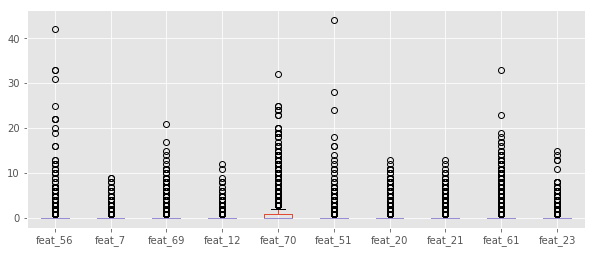

In [8]:
plt.figure(figsize=(10, 4))
df.boxplot()

We can see that in most features, most of our data is 0. The Box Plots have no size, and "stuck" at 0, and the data which is not zero is marked as outliers.

### Distribution of each feature within the classes

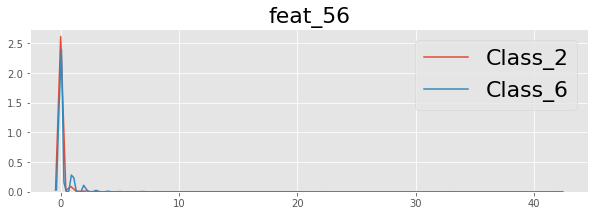

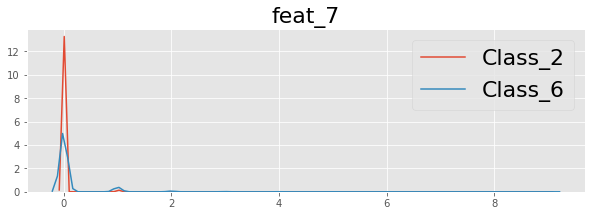

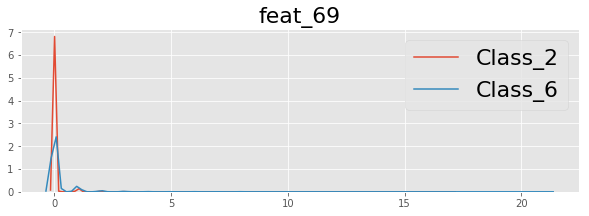

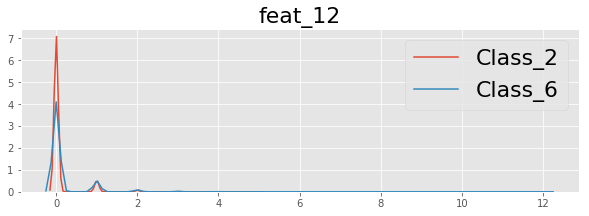

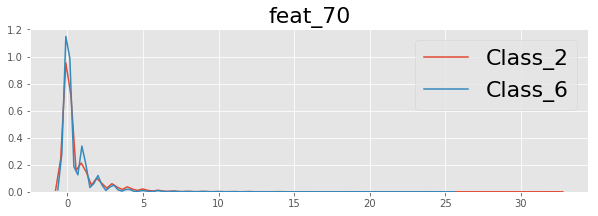

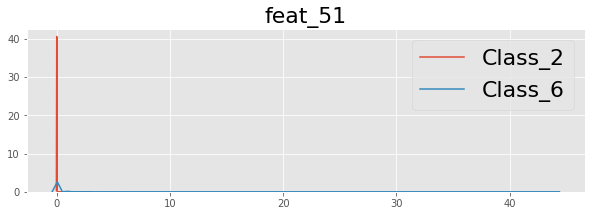

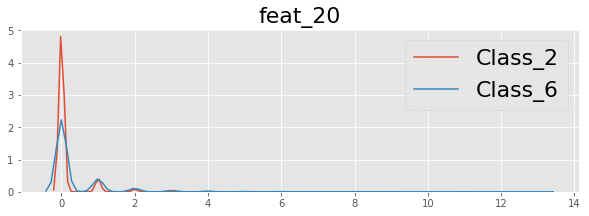

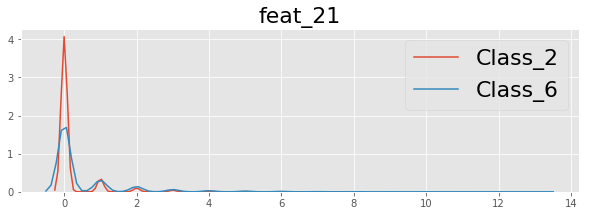

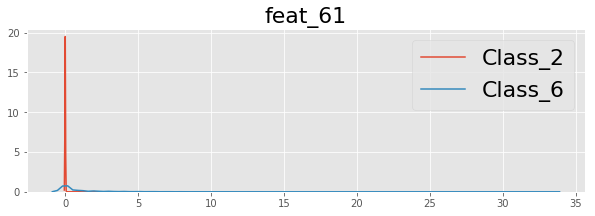

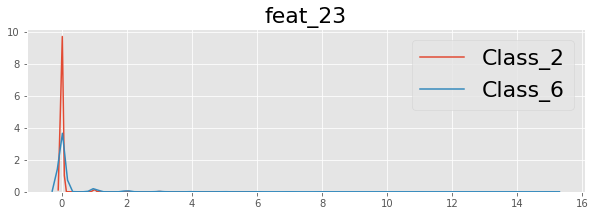

In [9]:
for col in df.columns[:-1]:
    plt.figure(figsize=(10,3))
    sns.kdeplot(df.loc[df.target=='Class_2', col], label='Class_2')  # KDE of class 2
    sns.kdeplot(df.loc[df.target=='Class_6', col], label='Class_6')  # KDE of class 6
    plt.legend(fontsize=22)
    plt.title(col, fontsize=22);

we can see that in most of the features the distributions of class6 and class 2 are similar. <br>
it means that it will be difficult to seperate between the classes and maybe 100% accuracy is not even not possible.

### Understand the sparse of each feature

Non zeros percent in each feture:


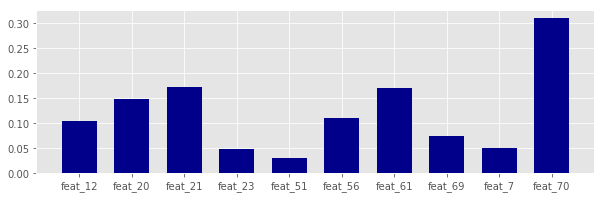

feat_56    0.110304
feat_7     0.050574
feat_69    0.073155
feat_12    0.103350
feat_70    0.311413
feat_51    0.030327
feat_20    0.148818
feat_21    0.171530
feat_61    0.169990
feat_23    0.047889
dtype: float64


In [10]:
print "Non zeros percent in each feture:"
y = ((df[:-1] !=0).sum() / row_num)[:-1]
x = df.columns[:-1]
plt.figure(figsize=(10,3))
width = 1/1.5
plt.bar(x, y, width, color="darkblue")
plt.show()
print (y)

We can see that the data is **very sparse**, places withot zero are very important, and we will build new features based on this insight.

### Understand the features correlation

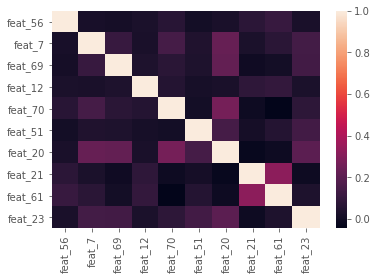

In [11]:
cor_mat = df.corr()
sns.heatmap(cor_mat)

We cannot see any significant correlation.

In [12]:
# For ease of use, lets declare an array called X that will include the features columns names, and Y, the target.

X = df[list(df.columns)[:-1]]
original_col = list(df.columns)[:-1] # list with the original features names
Y =  df['target']=='Class_2' #True (1) if the target is class_2, False (0) if the target is class_6


# Step 2 - Pre-Processing

### Outliers Removal
No Outliers Removal needed. Explanation can be find in the attached pdf.

### Feature extraction

In [13]:
# insert a feature with the number of zeros for each row
X['zeros_number'] = (X[original_col] == 0).astype(int).sum(axis=1)
extraction_col = ['zeros_number'] #list with the extraction features names
X.head(2)

,feat_56,feat_7,feat_69,feat_12,feat_70,feat_51,feat_20,feat_21,feat_61,feat_23,zeros_number
0,0,0,0,0,0,0,0,0,0,0,10
1,1,0,0,0,0,0,0,0,0,0,9


In [14]:
# insert a feature with the multiplication of all the row, to avoid from 0 to all- if the value is 0 we multiple with 1
# the idea- give greater meaning to number that are not 0 and appearing in the same row

def smart_multi(row):
    temp = 1
    for col in row:
        if col != 0:
            temp *= col
    return temp
X['smart_multi'] = X[original_col].apply(smart_multi, axis = 1)
extraction_col.append('smart_multi')
X.head(2)

,feat_56,feat_7,feat_69,feat_12,feat_70,feat_51,feat_20,feat_21,feat_61,feat_23,zeros_number,smart_multi
0,0,0,0,0,0,0,0,0,0,0,10,1
1,1,0,0,0,0,0,0,0,0,0,9,1


### Data Normalization

In [15]:
# MinMax normaliztion
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(X))
df_norm.columns = [col + "_norm" for col in X.columns]
minmax_norm_col = df_norm.columns
X = pd.concat([X, df_norm], axis=1)
print X.shape
X.head(2)


(22719, 24)


,feat_56,feat_7,feat_69,feat_12,feat_70,feat_51,feat_20,feat_21,feat_61,feat_23,...,feat_69_norm,feat_12_norm,feat_70_norm,feat_51_norm,feat_20_norm,feat_21_norm,feat_61_norm,feat_23_norm,zeros_number_norm,smart_multi_norm
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0
1,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.875,0.0


In [16]:
# z normalization (for PCA)
from scipy.stats.mstats import zscore

df_z_norm = pd.DataFrame(zscore(X[original_col + extraction_col]))
df_z_norm.columns = [col + "_z_norm" for col in X[original_col + extraction_col].columns]
z_norm_col = df_z_norm.columns
X = pd.concat([X, df_z_norm], axis=1)
print X.shape
print X.columns
X.head(2)


(22719, 36)
Index([u'feat_56', u'feat_7', u'feat_69', u'feat_12', u'feat_70', u'feat_51',
       u'feat_20', u'feat_21', u'feat_61', u'feat_23', u'zeros_number',
       u'smart_multi', u'feat_56_norm', u'feat_7_norm', u'feat_69_norm',
       u'feat_12_norm', u'feat_70_norm', u'feat_51_norm', u'feat_20_norm',
       u'feat_21_norm', u'feat_61_norm', u'feat_23_norm', u'zeros_number_norm',
       u'smart_multi_norm', u'feat_56_z_norm', u'feat_7_z_norm',
       u'feat_69_z_norm', u'feat_12_z_norm', u'feat_70_z_norm',
       u'feat_51_z_norm', u'feat_20_z_norm', u'feat_21_z_norm',
       u'feat_61_z_norm', u'feat_23_z_norm', u'zeros_number_z_norm',
       u'smart_multi_z_norm'],
      dtype='object')


,feat_56,feat_7,feat_69,feat_12,feat_70,feat_51,feat_20,feat_21,feat_61,feat_23,...,feat_69_z_norm,feat_12_z_norm,feat_70_z_norm,feat_51_z_norm,feat_20_z_norm,feat_21_z_norm,feat_61_z_norm,feat_23_z_norm,zeros_number_z_norm,smart_multi_z_norm
0,0,0,0,0,0,0,0,0,0,0,...,-0.195426,-0.289433,-0.434442,-0.100061,-0.320859,-0.35691,-0.330546,-0.170922,0.939273,-0.111817
1,1,0,0,0,0,0,0,0,0,0,...,-0.195426,-0.289433,-0.434442,-0.100061,-0.320859,-0.35691,-0.330546,-0.170922,0.167730,-0.111817


### Feature Extraction - Distance to closest neighbor per class

In [17]:
'''from sklearn.neighbors import NearestNeighbors

def distance_nn_per_class1(row):
    #print  X[minmax_norm_col][X[minmax_norm_col] == row]
    print row.name
    X_temp = X[minmax_norm_col].drop(X[minmax_norm_col].index[[row.name]])
    #print X
    X_temp = X[minmax_norm_col][X[minmax_norm_col] != row]
    X_temp = X_temp[Y == 1]
    #print X_temp
    neigh = NearestNeighbors(n_neighbords = 1)
    neigh.fit(X_temp)
    return neigh.kneighbors([row])[0]

def distance_nn_per_class0(row):
    X_temp = X.drop(df.index[[row.index]])
    X_temp = X_temp[[Y == 0]]
    neigh = NearestNeighbors(n_neighbords = 1)
    neigh.fit(X_temp)
    return neigh.kneighbors([row])[0]

w = X[minmax_norm_col].apply(distance_nn_per_class1, axis = 1)
w
# pd.concat(X_temp, Y)
#X_class'''

'from sklearn.neighbors import NearestNeighbors\n\ndef distance_nn_per_class1(row):\n    #print  X[minmax_norm_col][X[minmax_norm_col] == row]\n    print row.name\n    X_temp = X[minmax_norm_col].drop(X[minmax_norm_col].index[[row.name]])\n    #print X\n    X_temp = X[minmax_norm_col][X[minmax_norm_col] != row]\n    X_temp = X_temp[Y == 1]\n    #print X_temp\n    neigh = NearestNeighbors(n_neighbords = 1)\n    neigh.fit(X_temp)\n    return neigh.kneighbors([row])[0]\n\ndef distance_nn_per_class0(row):\n    X_temp = X.drop(df.index[[row.index]])\n    X_temp = X_temp[[Y == 0]]\n    neigh = NearestNeighbors(n_neighbords = 1)\n    neigh.fit(X_temp)\n    return neigh.kneighbors([row])[0]\n\nw = X[minmax_norm_col].apply(distance_nn_per_class1, axis = 1)\nw\n# pd.concat(X_temp, Y)\n#X_class'

now the feature extraction phase have completed <br>
we created main data frame with all the features named X <br>
in the next phases we will choose each time the slice from X we want to use <br>
we have 4 parts in X <br>
"original_col" <br>
"extraction_col" <br>
"minmax_norm_col" <br>
"z_norm_col" <br>

# Step 3 - Feature Selection

### PCA

Two first component with respect to class


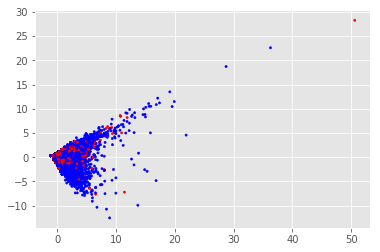

explained variance ratio:


<function matplotlib.pyplot.show>

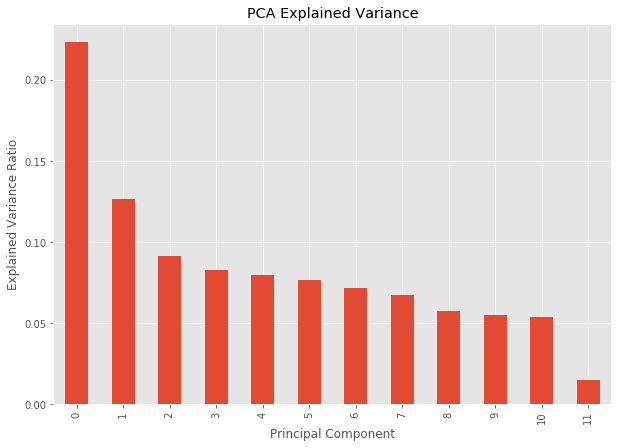

In [18]:
x = X[z_norm_col]
pca = PCA(n_components=12)
pca.fit(x)

#plot the two first component
print "Two first component with respect to class"
reduced_data_PCA = pca.transform(x)[:,:2]
plt.scatter(reduced_data_PCA[:, 0], reduced_data_PCA[:, 1], c=Y, s=5, cmap = "bwr")
plt.show()

# Plot the explained variance ration of the principal components
print "explained variance ratio:"
exp_var =  pd.DataFrame(pca.explained_variance_ratio_)
pd.DataFrame(pca.explained_variance_ratio_).plot.bar(title='PCA Explained Variance', legend=False, figsize=(10,7))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show

we can see that the PCA components are not very effective to seperate between the two classes. <br>
if we want to explain 90% of the variance we need to select 10 components within 12 <br>


### LDA

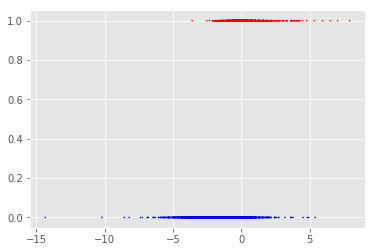

In [19]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X[minmax_norm_col] , Y)
reduced_data_LDA = LDA.transform(X[minmax_norm_col])
plt.scatter(reduced_data_LDA[:, 0], Y, c=Y, s=1, cmap = "bwr")
plt.show()

also LDA not very effective to seperate between the two classes. <br>

### Desicion tree

Feature ranking:
1. feat_61_norm (56.32%)
2. feat_20_norm (9.63%)
3. feat_51_norm (5.81%)
4. feat_70_norm (5.72%)
5. smart_multi_norm (5.07%)
6. feat_56_norm (3.19%)
7. feat_7_norm (3.15%)
8. feat_69_norm (2.76%)
9. feat_23_norm (2.62%)
10. feat_12_norm (1.96%)
11. zeros_number_norm (1.91%)
12. feat_21_norm (1.85%)


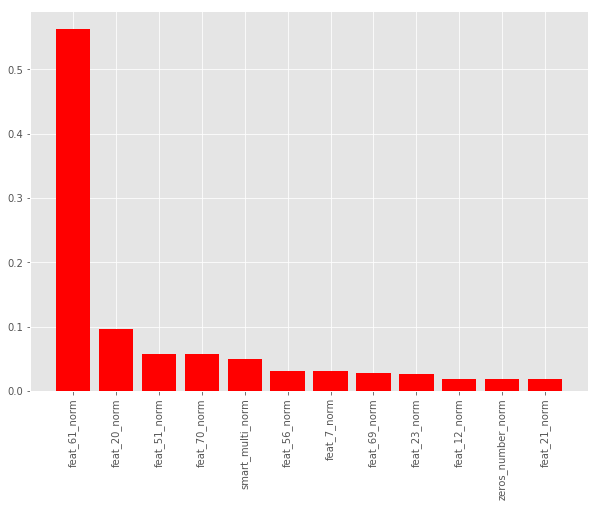

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier
tree = DecisionTreeClassifier(criterion= 'gini', splitter='best', max_depth=24, min_samples_split=2)

# Train the classifier
tree = tree.fit(X[minmax_norm_col], Y)

# Get the feature's importance
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for i, feature in enumerate(X[minmax_norm_col].columns[indices]):
    print("{}. {} ({:.2f}%)").format(i+1, feature, importances[indices][i]*100)
    
# Plot the feature importances
plt.figure(figsize=(10,7))
#plt.title('Feature importances')
plt.bar(range(X[minmax_norm_col].shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X[minmax_norm_col].shape[1]), X[minmax_norm_col].columns[indices], rotation='vertical')
plt.xlim([-1, X[minmax_norm_col].shape[1]])
plt.show()

according to the desicion tree feature importance we will defined reduced data with the most important 5 feature: <br>
"reduced_col"
<br> 

As a default we will use the minmax_norm_col features that include 12 dimensions

In [21]:
reduced_col = ['feat_61_norm', 'feat_20_norm', 'feat_70_norm', 'feat_51_norm', 'smart_multi_norm']
train_default = X[minmax_norm_col]
train_reduced = X[reduced_col]

# Models

### K-fold

In [22]:
from sklearn.model_selection import KFold

# Create a K-Fold object
k_fold = KFold(n_splits=5, shuffle=True, random_state=123)

# Split the train set into 5 sets of train and test
k_fold.split(train_default)

# Save the indices of the train and test of for each fold
k_fold_indices = []
for train_index, test_index in k_fold.split(train_default):
    k_fold_indices.append((train_index, test_index))
k_fold_indices


[(array([    0,     1,     2, ..., 22716, 22717, 22718]),
  array([   14,    19,    20, ..., 22700, 22707, 22708])),
 (array([    0,     1,     3, ..., 22715, 22716, 22717]),
  array([    2,     7,     8, ..., 22709, 22712, 22718])),
 (array([    0,     1,     2, ..., 22716, 22717, 22718]),
  array([    3,     6,    11, ..., 22704, 22706, 22715])),
 (array([    1,     2,     3, ..., 22716, 22717, 22718]),
  array([    0,     4,    29, ..., 22701, 22703, 22711])),
 (array([    0,     2,     3, ..., 22712, 22715, 22718]),
  array([    1,     5,    13, ..., 22714, 22716, 22717]))]

### ROC

In order to easily plot an ROC for every model, we will create a function for plotting.<br>
http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [41]:
def plot_ROC(fpr, tpr, auc):
    plt.figure(figsize=(10,7))
    plt.plot(fpr, tpr,lw=2, label='ROC Curve (AUC = {:.3f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    #plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

### KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def KNN_k_fold(k):
    accuracy = []
    auc = []
    
    for fold in range(len(k_fold_indices)):
        x_train = train_default.iloc[k_fold_indices[fold][0]]
        #print x_train.shape
        y_train = Y.iloc[k_fold_indices[fold][0]]
        #print y_train.shape
        knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski', algorithm = 'brute')
        knn.fit(x_train,y_train)
        
        x_test = train_default.iloc[k_fold_indices[fold][1]]
        y_test = Y.iloc[k_fold_indices[fold][1]]
        accuracy.append(knn.score(x_test, y_test))
        probs = knn.predict_proba(x_test)[:,1]
        auc.append(roc_auc_score(y_test, probs, average=None))
    return np.mean(np.array(accuracy)), np.mean(np.array(auc))
        
KNN_k_fold(5)    

(0.69668740486059666, 0.74906852028045745)

In [25]:
# find the best k
k_accuracy = []
k_auc =[]

k_range = [2**i for i in range(1,7,1)]
print k_range

for k in k_range:
    print "Starting KNN for k =", k
    knn_result = KNN_k_fold(k)
    k_accuracy.append(knn_result[0])
    k_auc.append(knn_result[1])
    print "accuracy :", knn_result[0], "\nauc :", knn_result[1], "\n"
print "K with Maximum Accuracy:", 2**(np.argmax(k_accuracy)+1),"\nK with Maximum AUC: ", 2**(np.argmax(k_auc)+1)


[2, 4, 8, 16, 32, 64]
Starting KNN for k = 2
accuracy : 0.563800309562 
auc : 0.705345604294 

Starting KNN for k = 4
accuracy : 0.655314446386 
auc : 0.744843110156 

Starting KNN for k = 8
accuracy : 0.737576944719 
auc : 0.764173417396 

Starting KNN for k = 16
accuracy : 0.740349938615 
auc : 0.77318894526 

Starting KNN for k = 32
accuracy : 0.743430934219 
auc : 0.775696532348 

Starting KNN for k = 64
accuracy : 0.740525946511 
auc : 0.776841300307 

K with Maximum Accuracy: 32 
K with Maximum AUC:  64


the results for K=32 and K=64 are very close. the difference in the accuracy is little bit bigger, so we will take K=32

                  Condition positive  Condition negative
Predict positive                1282                 841
Predict negative                 327                2094


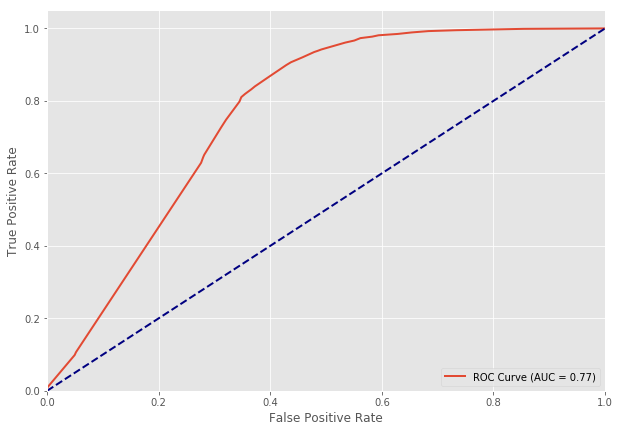

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

# plot the metrics of the wining K, we will use random fold from k-fold
fold = 1
x_train = train_default.iloc[k_fold_indices[fold][0]]
#print x_train.shape
y_train = Y.iloc[k_fold_indices[fold][0]]
#print y_train.shape

knn = KNeighborsClassifier(n_neighbors=32, p=2, metric='minkowski', algorithm = 'brute')
knn.fit(x_train, y_train)
x_test = train_default.iloc[k_fold_indices[fold][1]]
y_test = Y.iloc[k_fold_indices[fold][1]]
predict = knn.predict(x_test)
probs = knn.predict_proba(x_test)[:,1]

cm = pd.DataFrame(confusion_matrix(y_test, predict, labels=None, sample_weight=None), index = ["Predict positive","Predict negative"])
cm.columns = ['Condition positive', 'Condition negative' ]
print cm
fpr, tpr, thresholds  = roc_curve(y_test, probs, pos_label=1)
auc = roc_auc_score(y_test, probs, average=None)
plot_ROC(fpr, tpr, auc)

### Logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty="l2", #What is our loss function? l2 stands for quad_distances, l1 stands for abs distance.
                         dual=False, #How to define our objective function, as the primal or the dual?
                         tol=0.0001, #Stopping critiria
                         C=1, #Inverse regularization parameter, large C means less regularization.
                         fit_intercept=True, #As it sounds, do we want to learn an intercept?
                         intercept_scaling=1, #What is the initialization of the intercept parameter
                         class_weight=None, #How to treat different classes?
                         random_state=123, #The seed
                         solver="liblinear", #What is the algorithm used to solve the problem?
                         max_iter=1000, #For some optimization algorithms, the algorithm solves it with iterations.
                         verbose=2, 
                         warm_start=False, 
                         n_jobs=1)
lr.fit(train_default, Y)
predict = lr.predict(train_default)
print "\nmean accuracy = ", lr.score(train_default, Y), "\n"

cm = pd.DataFrame(confusion_matrix(Y, predict, labels=None, sample_weight=None), index = ["Predict positive","Predict negative"])
cm.columns = ['Condition positive', 'Condition negative' ]
print cm

[LibLinear]
mean accuracy =  0.728641225406 

                  Condition positive  Condition negative
Predict positive                5839                4821
Predict negative                1344               10715


### Random Forest

Choose Random Forest Parameters:<br>
In order to find the best parameters (out of a set of options), we will use a class from sklearn called GridSearchCV. <br>
GridSearchCV will do an exhaustive search over the specified parameter values, and will estimate the best ones.<br>
for more information: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parmeters grid to be checked
parametersOptions = {'min_samples_split':[4, 8, 16, 20], 'max_depth':[5,8,10,20,30],'criterion':['gini', 'entropy'],
                   'n_estimators':[50], 'random_state':[1]}

# GridSearchCV will create different Forests from the different parameters,
#  and will eventually choose the model with the best AUC score
RF = GridSearchCV(RandomForestClassifier(), parametersOptions, cv=5, scoring='roc_auc')

RF.fit(train_default, Y)

params = forest_classifier.best_params_

print ('Random Forest chosen parameters (recieved best AUC): {}'.format(params))
print "Random Forest AUC score with the chosen parameters: ", RF.best_score_

Random Forest chosen parameters (recieved best AUC): {'min_samples_split': 8, 'n_estimators': 50, 'random_state': 1, 'criterion': 'gini', 'max_depth': 10}


In order to plot the ROC curve and shwo the confusion matrix, we will train a new Random Forest Model, with the chosen parameters, on one of our K-Folds.

                  Condition positive  Condition negative
Predict positive                1196                 927
Predict negative                 197                2224


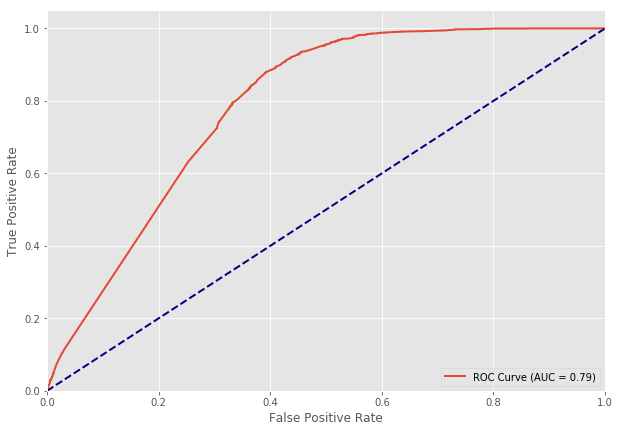

In [37]:
chosenRF = RandomForestClassifier(min_samples_split= 8,
                                  n_estimators= 50,
                                  random_state= 1,
                                  criterion= 'gini',
                                  max_depth= 10)

fold = 1
x_train = train_default.iloc[k_fold_indices[fold][0]]
#print x_train.shape
y_train = Y.iloc[k_fold_indices[fold][0]]
#print y_train.shape

chosenRF.fit(x_train, y_train)
x_test = train_default.iloc[k_fold_indices[fold][1]]
y_test = Y.iloc[k_fold_indices[fold][1]]
predict = chosenRF.predict(x_test)
probs = chosenRF.predict_proba(x_test)[:,1]

cm = pd.DataFrame(confusion_matrix(y_test, predict, labels=None, sample_weight=None), index = ["Predict positive","Predict negative"])
cm.columns = ['Condition positive', 'Condition negative' ]
print cm
fpr, tpr, thresholds  = roc_curve(y_test, probs, pos_label=1)
auc = roc_auc_score(y_test, probs, average=None)
plot_ROC(fpr, tpr, auc)

# Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

# As shown before, we will start searching our hyper parameters with GridSearchCV

parametersOptions = {'activation' : ["logistic","relu", "tanh"], #
                     'hidden_layer_sizes' : [(1000,), # 1 large hidden layer
                                            (500, 500,), # 2 medium size layers
                                            (200, 200, 100, 100, 100,)], # multiple small sized layers
                     'batch_size' : [5, 50, 200],
                     'max_iter' : [100, 500, 2000]}
                     
GS = GridSearchCV(MLPClassifier(), parametersOptions, cv=5, scoring='roc_auc')

GS.fit(train_default, Y)

params = forest_classifier.best_params_

print ('Neural Network chosen parameters (recieved best AUC): {}'.format(params))
print "Neural Network AUC score with the chosen parameters: ", GS.best_score_

                  Condition positive  Condition negative
Predict positive                1146                 977
Predict negative                 232                2189


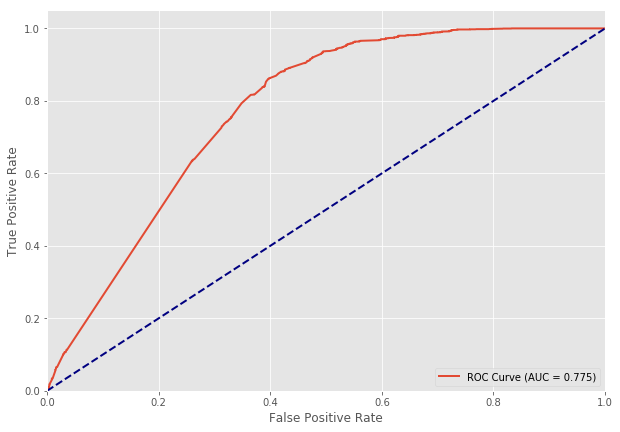

In [44]:
NN_classifier = MLPClassifier(
                    #-----The ARCHITECTURE:------#                
                    activation="logistic", #We will use a logistic function, in order to
                    hidden_layer_sizes = (500,),  #What is the architecture? what happens if we add more layers?
                    alpha = 0.0001, #The regularization: loss + alpha*W^2
                    batch_size = 50, # Size of minibatches for stochastic optimizers. Our dataset is not huge, so we chose a smaller size then the auto (200)
    
                    #-----The OPTIMIZER:------#
                    solver = "sgd", #Stochastic Gradient Descent
                    learning_rate = "adaptive", #How does the learning rate update itself? {‘constant’, ‘invscaling’, ‘adaptive’}
                    learning_rate_init = 0.1, #What is the initial learning rate? in some optimizers the learning rate changes.
                    power_t = 0.5, #When we choose learning rate to be invscaling, it means that we multiply this number each epoch.
                    momentum = 0.9, #Whats the fraction of the updated dedicated to the momentum? the "friction".
                    nesterovs_momentum = False, #Out of the scope of the course, leave false.
                    early_stopping = False, #Do we set a validation data aside?
                    tol = 1e-4, #A broad concept of converges, when we can say the algorithm converged?
                    warm_start = False, #if we fit at the second time, do we start from the last fit?
                    max_iter = 500)


fold = 1
x_train = train_default.iloc[k_fold_indices[fold][0]]
#print x_train.shape
y_train = Y.iloc[k_fold_indices[fold][0]]
#print y_train.shape

NN_classifier.fit(x_train, y_train)
x_test = train_default.iloc[k_fold_indices[fold][1]]
y_test = Y.iloc[k_fold_indices[fold][1]]
predict = NN_classifier.predict(x_test)
probs = NN_classifier.predict_proba(x_test)[:,1]

cm = pd.DataFrame(confusion_matrix(y_test, predict, labels=None, sample_weight=None), index = ["Predict positive","Predict negative"])
cm.columns = ['Condition positive', 'Condition negative' ]
print cm
fpr, tpr, thresholds  = roc_curve(y_test, probs, pos_label=1)
auc = roc_auc_score(y_test, probs, average=None)
plot_ROC(fpr, tpr, auc)